# First approach

Import libraries

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from sympy import Symbol
import copy as cp
import seaborn as sns

Read dataset

In [328]:
data=pd.read_excel("./Dataset/Flow_history.xls")
data=pd.DataFrame(np.array(data),columns=['Year','Flow','Height'])

# Data with all year/flow/height (height=NaN included)
data["year"]=data["Year"].to_numpy().astype(int)
data_year= data["Year"].to_numpy().astype(int)
data_flow = data["Flow"].to_numpy()
data_height = data["Height"].to_numpy()

# Data with all year/flow/height (height=NaN not included)
data2 = data.dropna(axis='rows')
data2["Year"]=data2["Year"].to_numpy().astype(int)
data_year2= data2["Year"].to_numpy().astype(int)
data_flow2= data2["Flow"].to_numpy()
data_height2 = data2["Height"].to_numpy()
print(data2.describe())


              Year         Flow      Height         year
count   123.000000   123.000000  123.000000   123.000000
mean   1926.422764  1303.299533    3.896748  1926.422764
std      44.273740   681.342988    1.272337    44.273740
min    1850.000000   122.435600    1.000000  1850.000000
25%    1886.500000   796.274404    3.100000  1886.500000
50%    1931.000000  1255.005113    3.900000  1931.000000
75%    1961.500000  1616.866106    4.750000  1961.500000
max    1997.000000  3361.255608    7.200000  1997.000000


/home/lawson/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


# Data visualisation

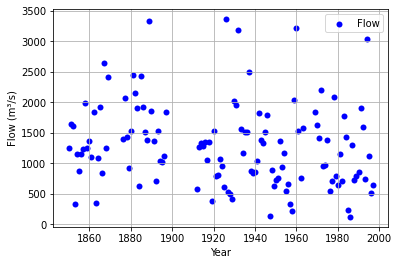

In [329]:
plt.figure()
plt.scatter(data_year2, data_flow2, color="blue", label="Flow",linewidths=0.0001)
plt.legend()
plt.grid(axis="both")
plt.xlabel("Year")
plt.ylabel("Flow (m³/s)")
plt.show()


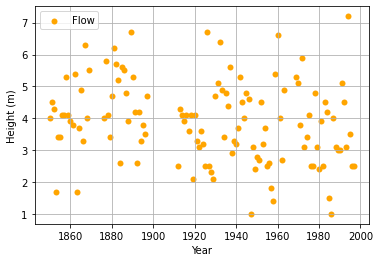

In [330]:
plt.figure()
plt.scatter(data_year2, data_height2, color="orange", label="Flow",linewidths=0.0001)
plt.legend()
plt.grid(axis="both")
plt.xlabel("Year")
plt.ylabel("Height (m)")
plt.show()

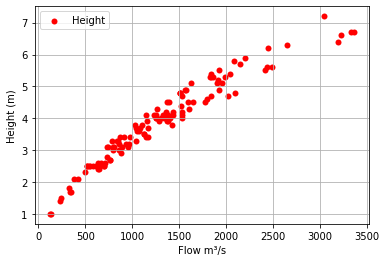

In [331]:
plt.figure()
plt.scatter(data_flow2, data_height2, color="red", label="Height",linewidths=0.0001)
plt.grid(axis="both")
plt.xlabel("Flow m³/s")
plt.ylabel("Height (m)")
plt.legend()
plt.show()



# Determining missing heights

Model

In [332]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

degree=3
model=make_pipeline(PolynomialFeatures(degree),LinearRegression())

# Training data
x_train, x_test, y_train, y_test = train_test_split(data_flow2, data_height2, test_size=0.2, random_state=40)
x_train=x_train.reshape((-1,1))
x_test=x_test.reshape((-1,1))
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

Error

In [337]:
# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
r2_value = r2_score(y_test, y_pred)                     

print("Root Mean Square Error:\n", rmsd)
print("R^2 Value:\n", r2_value)



Root Mean Square Error:
 0.2215850843778888
R^2 Value:
 0.9686061703204885


Plot error  

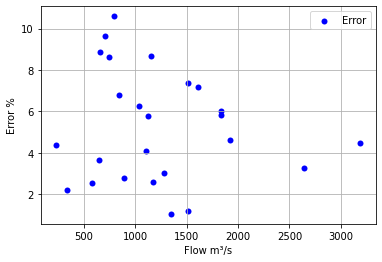

In [338]:
# Predict the output
error=abs(y_pred-y_test)

plt.figure()
plt.scatter(x_test, 100*abs(y_pred-y_test)/y_test, color="blue", label="Error",linewidths=0.0001)
plt.grid(axis="both")
plt.xlabel("Flow m³/s")
plt.ylabel("Error %")
plt.legend()
plt.show()

Determing missing data

In [334]:
Years=np.linspace(np.min(data_year),np.max(data_year),num=((np.max(data_year)-np.min(data_year)+1))).astype(int)
Flow=cp.deepcopy(data_flow)
Height=[]
for i in Years:
    if  i not in data_year2:
        Height.append(model.predict((data_flow[i-np.min(data_year).reshape((-1,1))])))
    else:
        Height.append(data_height[i-np.min(data_year)])

Plot new heights

/home/lawson/.local/lib/python3.7/site-packages/numpy/ma/core.py:2830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  order=order, subok=True, ndmin=ndmin)


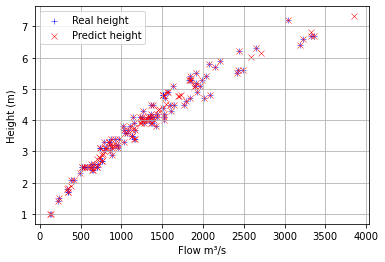

In [335]:
plt.figure()
plt.scatter(data_flow2, data_height2,marker='+',color="blue", label="Real height",linewidths=0.5)
plt.grid(axis="both")
plt.xlabel("Flow m³/s")
plt.ylabel("Height (m)")
plt.scatter(Flow, Height, marker='x',color="red", label="Predict height",linewidths=0.5)
plt.legend()
plt.show()

# Histogram

/home/lawson/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lawson/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


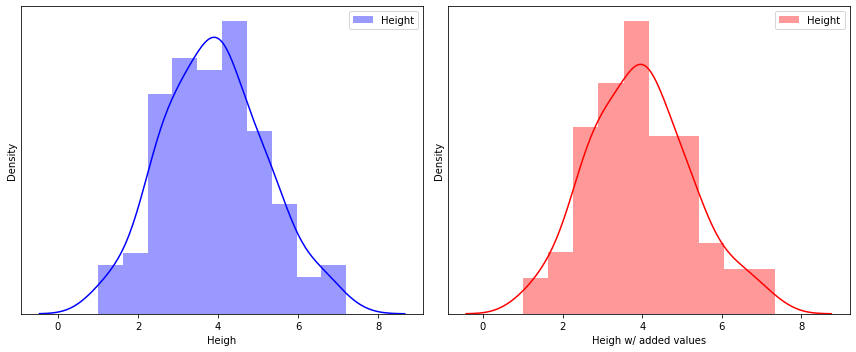

In [336]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.distplot(data_height2,color="blue",ax=ax[0],label='Height')
ax[0].set_yticks([])
ax[0].set_xlabel('Heigh')
ax[0].legend()
sns.distplot(Height,color="red",ax=ax[1],label='Height')
ax[1].set_yticks([])
ax[1].set_xlabel('Heigh w/ added values')
ax[1].legend()
plt.tight_layout()
plt.show()
#